# <p style="background-color:#4682B4; font-family:calibri; color:white; font-size:200%; text-align:center; border-radius:15px 15px;">E-Commerce Product Delivery Prediction</p>

<div style="border-radius:10px; padding: 15px; background-color: #4682B4; font-size:120%; text-align:left">

<h3 align="left"><font color=white>Problem Statement:</font></h3>
<h4><font color=white>E-commerce businesses face a critical challenge in ensuring timely delivery of products. Delayed shipments not only impact customer satisfaction but also business reputation. The aim of this project is to predict whether an e-commerce product will be delivered on time by analyzing factors like customer behavior, product properties, and logistics.</font></h4>>

<div style="border-radius:10px; padding: 15px; background-color: #4682B4; font-size:120%; text-align:left">

<h3 align="left"><font color=white>Methodology:</font></h3>
<h4><font color=white>
    Data Preprocessing: Cleaned and prepared data, handling missing values, duplicates, and irrelevant columns.<br><br>
    Exploratory Data Analysis (EDA): Investigated distribution of variables, customer behavior, and logistics factors using visualizations.<br><br>
    Feature Engineering: Transformed categorical variables using label encoding.<br><br>
    Model Building: Deployed machine learning models like Random Forest, Decision Tree, Logistic Regression, and KNN to predict delivery outcomes.<br><br>
    Model Evaluation: Assessed models based on accuracy, confusion matrix, and classification reports.
</font></h4>
</div>


![Sample Image](smp.jpg)


<a id="import"></a>
<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px; padding:10px;">
    Step 1 | Import Libraries
</p>


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="read"></a>
<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px; padding:10px;">
    Step 2 | Read Dataset
</p>


In [41]:
df = pd.read_csv('E_Commerce.csv')
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


<div style="border-radius:10px; padding: 15px; background-color: #4682B4; font-size:120%; text-align:left">
    <h3 align="left"><font color=white>Data Dictionary:</font></h3>
    <ul style="list-style: none; padding-left: 0;">
        <li><font color=white>• <b>ID:</b> ID Number of Customers</font></li>
        <li><font color=white>• <b>Warehouse_block:</b> The company has a large warehouse divided into blocks A, B, C, D, E</font></li>
        <li><font color=white>• <b>Mode_of_Shipment:</b> The company ships products via Ship, Flight, and Road</font></li>
        <li><font color=white>• <b>Customer_care_calls:</b> Number of calls made for shipment inquiries</font></li>
        <li><font color=white>• <b>Customer_rating:</b> Ratings provided by customers, ranging from 1 (Worst) to 5 (Best)</font></li>
        <li><font color=white>• <b>Cost_of_the_Product:</b> Cost of the product in US Dollars</font></li>
        <li><font color=white>• <b>Prior_purchases:</b> Number of prior purchases</font></li>
        <li><font color=white>• <b>Product_importance:</b> Product categorized as low, medium, or high importance</font></li>
        <li><font color=white>• <b>Gender:</b> Male or Female</font></li>
        <li><font color=white>• <b>Discount_offered:</b> Discount offered on the specific product</font></li>
        <li><font color=white>• <b>Weight_in_gms:</b> Weight of the product in grams</font></li>
        <li><font color=white>• <b>Reached.on.Time_Y.N:</b> Target variable: 1 indicates the product was delivered on time, 0 indicates it was NOT delivered on time</font></li>
    </ul>
</div>


<a id="overview"></a>
<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 15px; padding:10px;">
    Step 3 | Dataset Overview
</p>


In [45]:
#Check the shape of the dataset
df.shape

(10999, 12)

In [47]:
#Check data types of the columns
df.dtypes


ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [49]:
#Drop column
df.drop(['ID'], axis=1, inplace=True)


In [51]:
#Check null/missing values
df.isnull().sum()



Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [53]:
df.describe()


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


<a id="eda"></a>
<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px 15px; padding:10px;">
    Step 4 | EDA
</p>


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
    Customer Gender Prediction
</p>
>
>


Text(0.5, 1.0, 'Gender Distribution')

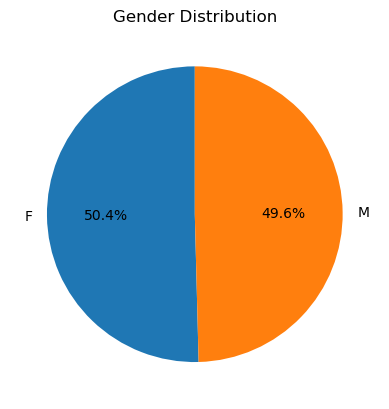

In [57]:
plt.pie(df['Gender'].value_counts(),labels = ['F','M'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')

<div style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 60%; margin: 0 auto; border-radius:10px 50px; border: 2px solid white; box-shadow: 0 0 10px white;">
    Insight:The dataset has an equal number of both male and female customers, with percentages of 49.6% and 50.4%, respectively.
</div>


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
    Product Properties
</p>


Text(0.5, 1.0, 'Cost of the Product')

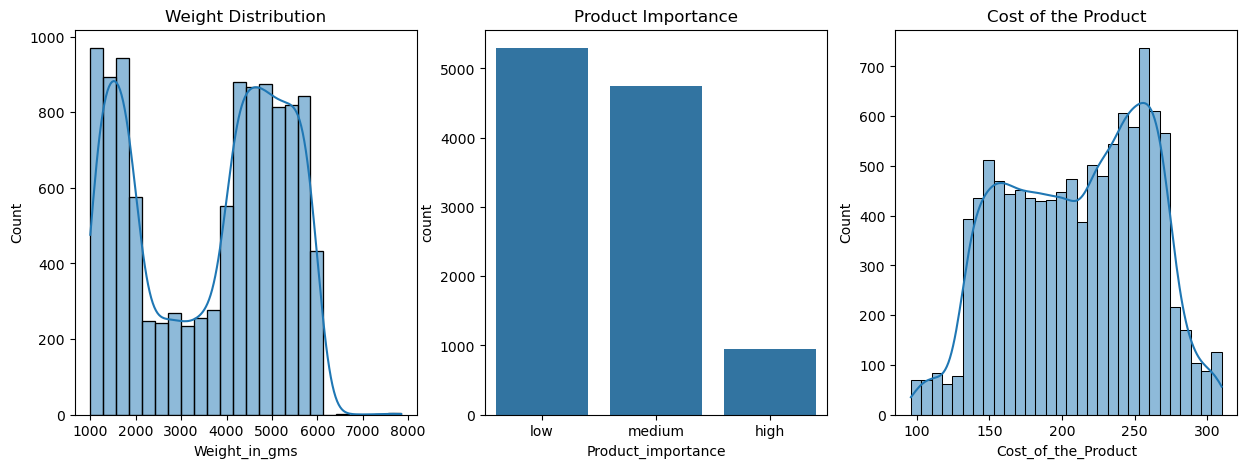

In [61]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')

<div style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 60%; margin: 0 auto; border-radius:10px 50px; border: 2px solid white; box-shadow: 0 0 10px white;">
    Insight:<br>
    1.Most products weigh between 1000-2000 grams and 4000-6000 grams.<br>
    2.Products are mostly categorized as having low or medium importance.<br>
    3.The majority of products are priced between 150-275 dollars.<br>
    This shows the company primarily sells lightweight, moderately important, and mid-priced products.
</div>


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
    Logistics
</p>

Text(0.5, 1.0, 'Reached on Time')

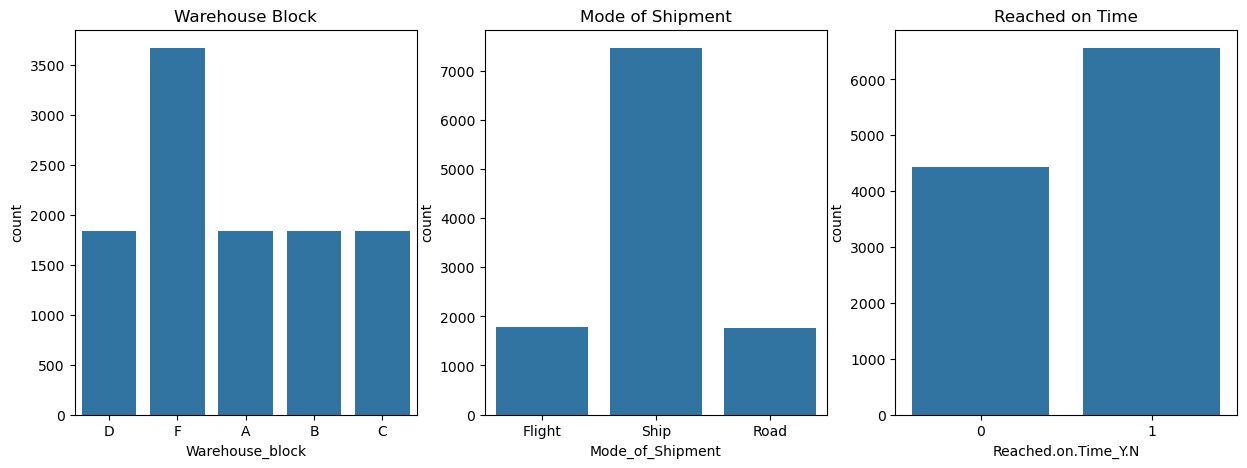

In [64]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0]).set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1]).set_title('Mode of Shipment')
sns.countplot(x = 'Reached.on.Time_Y.N', data = df, ax=ax[2]).set_title('Reached on Time')

<div style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 60%; margin: 0 auto; border-radius:10px 50px; border: 2px solid white; box-shadow: 0 0 10px white;">
    Insight:<br>
    1.Warehouse F handles the most products (around 3500), while other warehouses manage fewer.<br>
    2.Most products are shipped by sea, with around 2000 transported by flight and road.<br>
    3.More products are delivered late than on time.<br>
    Warehouse F is likely located near a seaport, given its high product volume and reliance on shipping.<br>
</div>


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
    Customer Experience
</p>


Text(0.5, 1.0, 'Discount Offered')

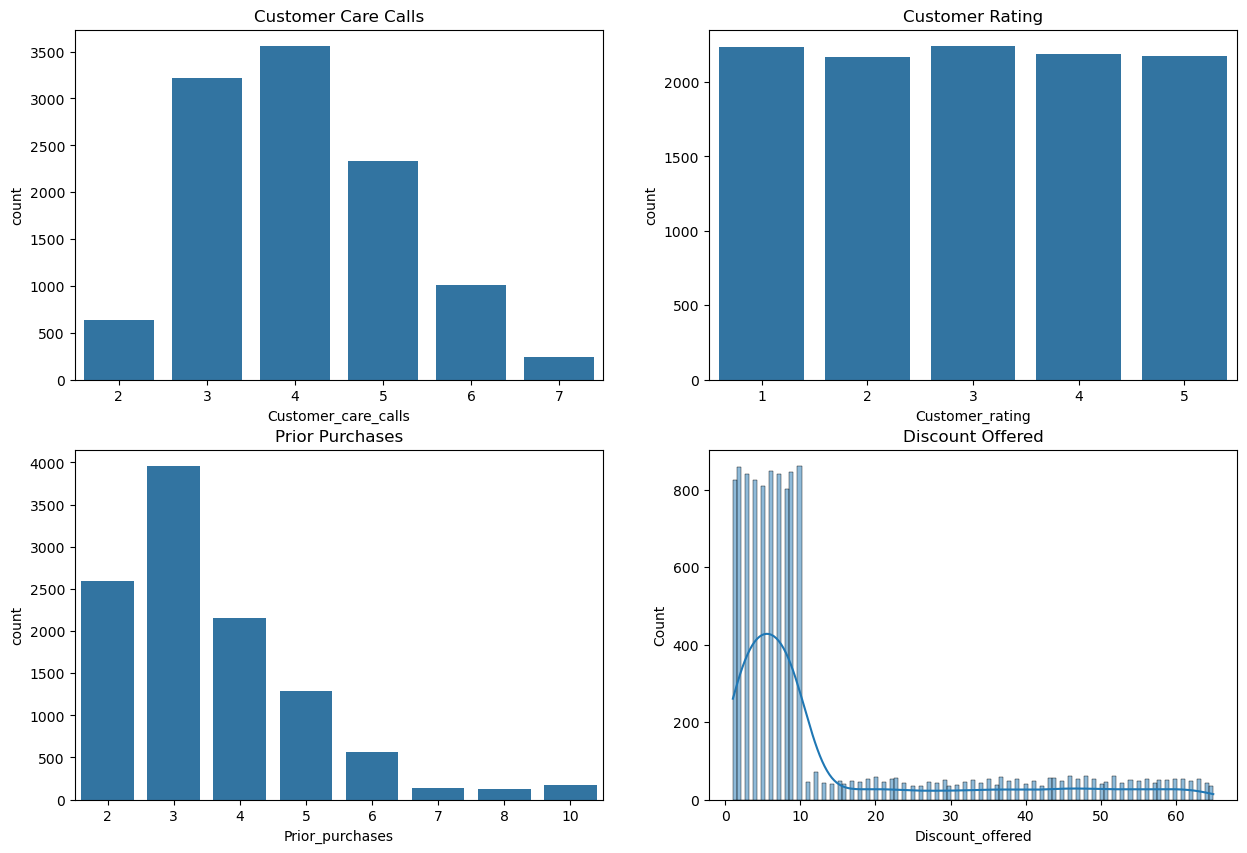

In [68]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')

<div style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 60%; margin: 0 auto; border-radius:10px 50px; border: 2px solid white; box-shadow: 0 0 10px white;">
    Insight:<br>
    1. Most customers make 3-4 customer care calls, possibly due to delivery issues.<br>
    2. Customer ratings are evenly distributed, but there are slightly more 1-star ratings, indicating some dissatisfaction.<br>
    3. Majority of customers have made 2-3 prior purchases, suggesting repeat customers are satisfied.<br>
    4. Most products have a 0-10% discount, showing limited discount offerings.<br>
</div>


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
    Customer Gender and Product Delivery
</p>


Text(0.5, 1.0, 'Gender vs Reached on Time')

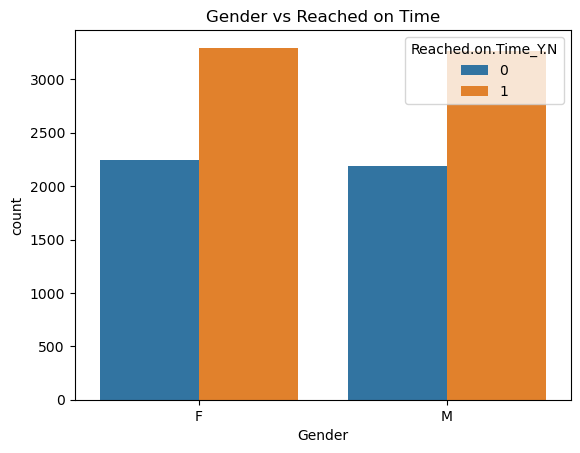

In [72]:
sns.countplot(x = 'Gender', data = df, hue = 'Reached.on.Time_Y.N').set_title('Gender vs Reached on Time')

<div style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 60%; margin: 0 auto; border-radius:10px 50px; border: 2px solid white; box-shadow: 0 0 10px white;">
    Insight:<br>
    The data shows that timely delivery is consistent for both genders, indicating gender does not affect delivery punctuality.<br>
</div>


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
    Product Properties and Product Delivery
</p>


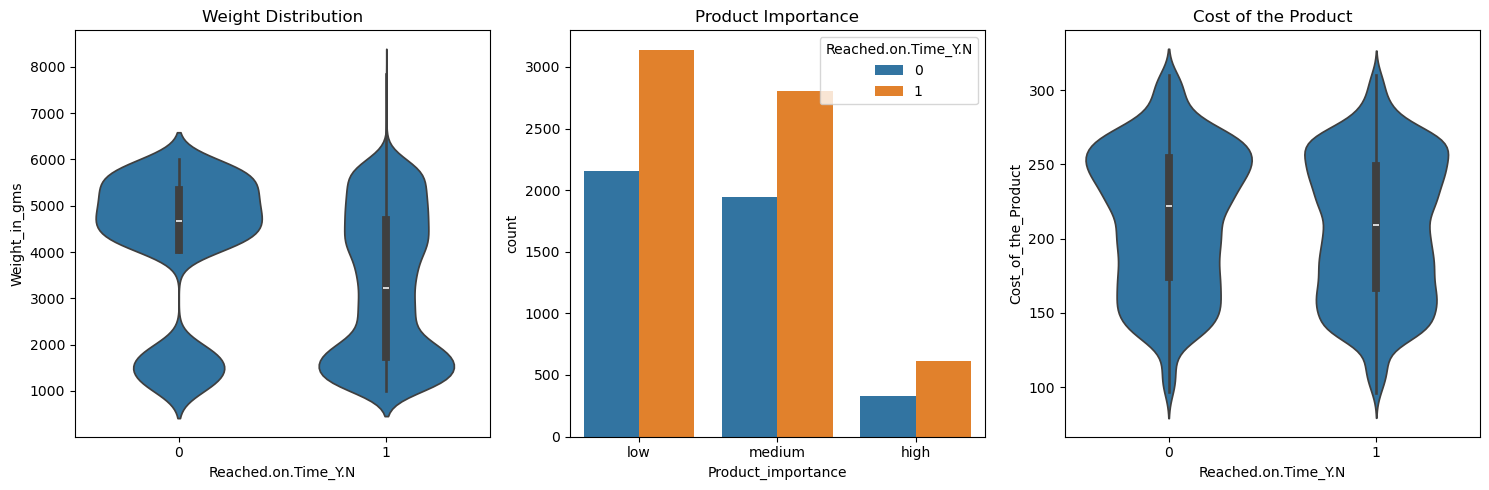

In [76]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms', data = df, ax=ax[0]).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Product Importance')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Cost_of_the_Product', data = df, ax=ax[2]).set_title('Cost of the Product')
plt.tight_layout()
plt.show()

<div style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 60%; margin: 0 auto; border-radius:10px 50px; border: 2px solid white; box-shadow: 0 0 10px white;">
    Insight:<br>
    1. Product weight affects delivery timeliness. Products over 4500 grams are often late, while those in the 2500-3500 gram range are delivered on time.<br>
    2. Product importance does not significantly impact delivery timeliness.<br>
    3. Products costing over $250 tend to be delivered late.<br>
    product weight and cost are key factors influencing delivery timeliness.<br>
</div>


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
    Logistics and Product Delivery
</p>


Text(0.5, 1.0, 'Mode of Shipment')

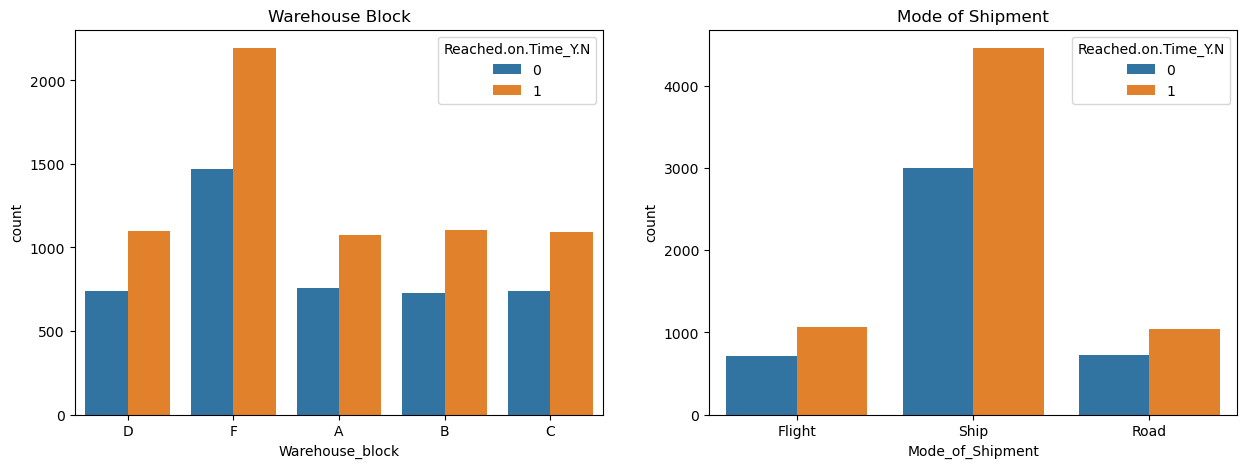

In [80]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')

<div style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 60%; margin: 0 auto; border-radius:10px 50px; border: 2px solid white; box-shadow: 0 0 10px white;">
    Insight:<br>
    1. Most products are shipped from warehouse F, likely near a seaport, and are primarily transported by ship.<br>
    2. Despite the high shipping volume, there is a consistent difference between on-time and late deliveries across all warehouses and shipping methods.<br>
    3. This consistency suggests that warehouse location and shipping method don't significantly impact delivery timeliness.<br>
</div>


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
    Customer Experience and Product Delivery

</p>


Text(0.5, 1.0, 'Discount Offered')

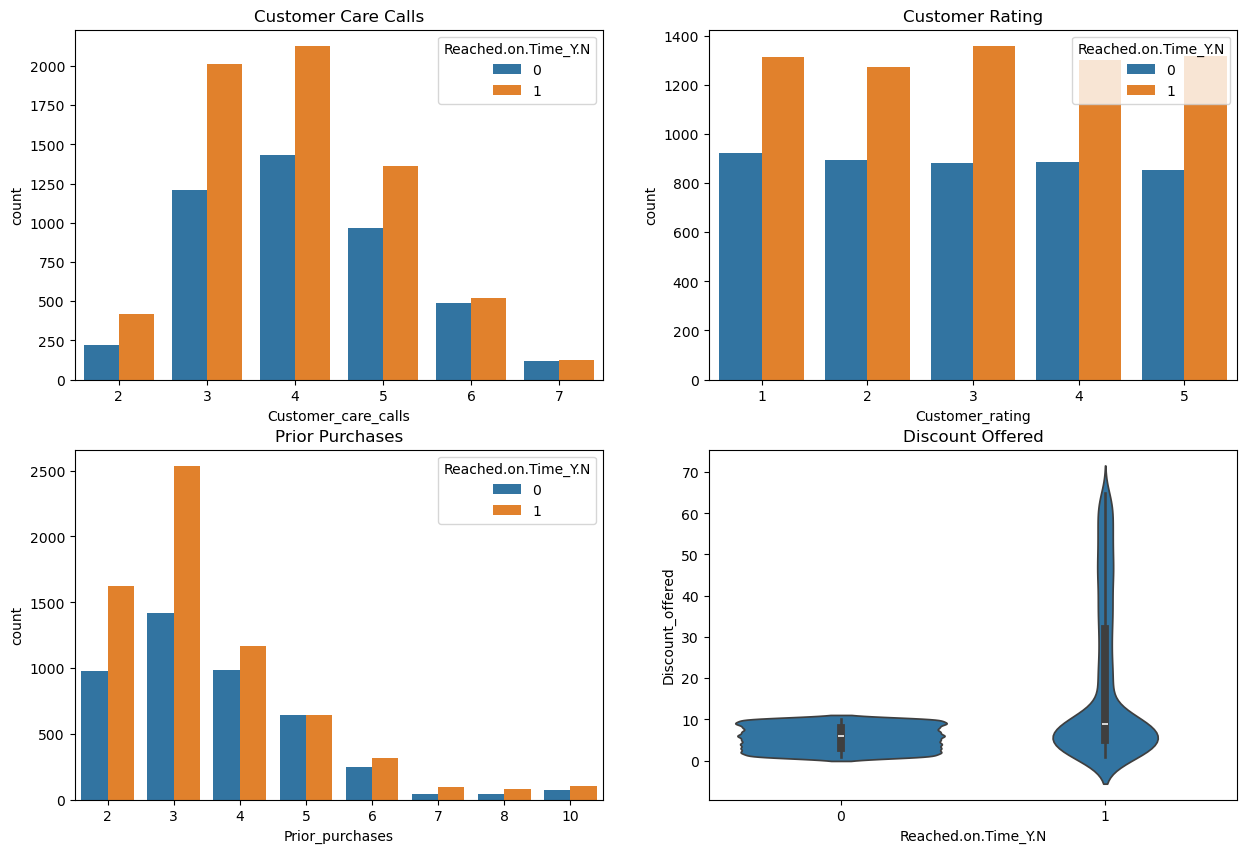

In [83]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1]).set_title('Discount Offered')

<div style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 60%; margin: 0 auto; border-radius:10px 50px; border: 2px solid white; box-shadow: 0 0 10px white;">
    Insight:<br>
    1. More customer care calls are made when deliveries are late.<br>
    2. Customers with higher ratings tend to receive their products on time.<br>
    3. Repeat customers generally get their products on time.<br>
    4. Products with discounts under 10% are often delivered late, while those with higher discounts are delivered on time more often.<br>
</div>


<a id="import"></a>
<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px; padding:10px;">
    Step 5 | Data Preprocessing 
</p>


In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Label encode each column 
df['Warehouse_block'] = label_encoder.fit_transform(df['Warehouse_block'])
df['Mode_of_Shipment'] = label_encoder.fit_transform(df['Mode_of_Shipment'])
df['Product_importance'] = label_encoder.fit_transform(df['Product_importance'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [90]:
print(df[['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']].head())

   Warehouse_block  Mode_of_Shipment  Product_importance  Gender
0                3                 0                   1       0
1                4                 0                   1       1
2                0                 0                   1       1
3                1                 0                   2       1
4                2                 0                   2       0


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
    Correlation Matrix Heatmap
</p>

<Axes: >

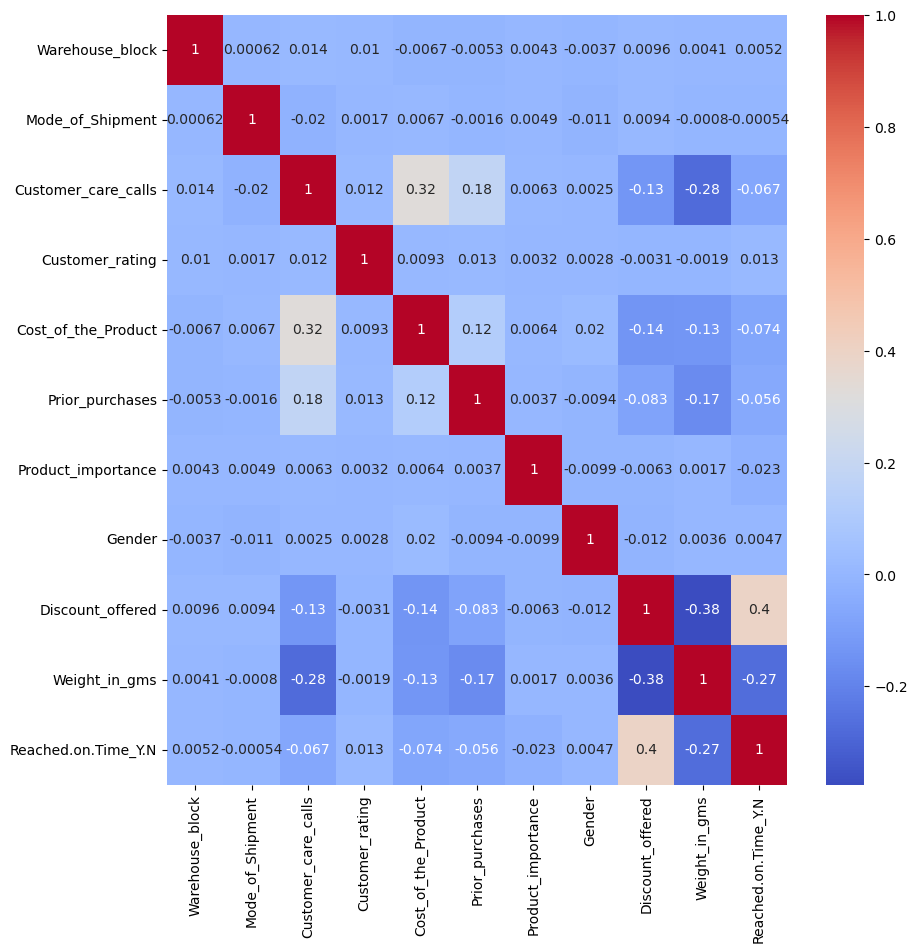

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<div style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 60%; margin: 0 auto; border-radius:10px 50px; border: 2px solid white; box-shadow: 0 0 10px white;">
    Insight:<br>
  1.  Variables with Strong Correlation:<br>
    - Discount_offered & Reached.on.Time_Y.N (0.4): Higher discounts may impact delivery times due to logistical challenges.<br>
    - Cost_of_the_Product & Customer_care_calls (0.32): Expensive products lead to more customer inquiries.<br><br>2.
    Variables with Negative Correlation:<br>
    - Discount_offered & Weight_in_gms (-0.38): Heavier products get lower discounts due to higher costs.<br>
    - Weight_in_gms & Reached.on.Time_Y.N (-0.27): Heavier products are less likely to arrive on time, likely due to delays in shipping.
</div>


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
   Product Cost vs Customer Care Calls
</p>

<Axes: xlabel='Customer_care_calls', ylabel='Cost_of_the_Product'>

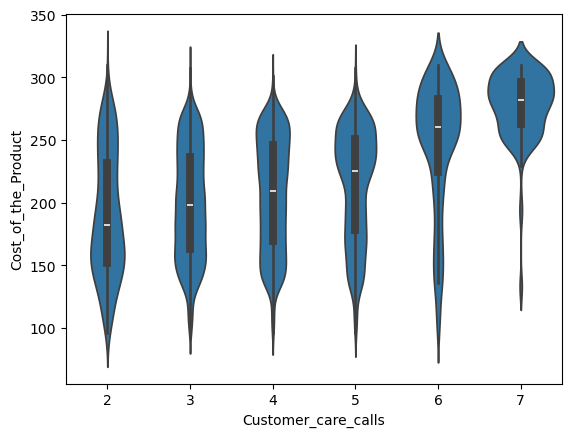

In [100]:
sns.violinplot(x = 'Customer_care_calls', y = 'Cost_of_the_Product', data = df)


<div style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 60%; margin: 0 auto; border-radius:10px 50px; border: 2px solid white; box-shadow: 0 0 10px white;">
    Insight:<br>
   1.Expensive products often lead to more customer care calls, as seen with 6-7 calls having higher median costs.<br>   2.
Cheaper products have fewer customer care interactions and a broader cost range<br>.
</div>


<a id="import"></a>
<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px; padding:10px;">
    Step 6 | Train Test Split
</p>


In [104]:
from sklearn.model_selection import train_test_split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Reached.on.Time_Y.N', axis=1), df['Reached.on.Time_Y.N'], test_size=0.2, random_state=0)


<a id="import"></a>
<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px; padding:10px;">
    Step 7 | Model Building
</p>


<div style="border-radius:10px; padding: 15px; background-color: #4682B4; font-size:120%; text-align:left">
<h4><font color=white>
    Using the following models to predict the product delivery:<br><br>
    - Random Forest Classifier<br><br>
    - Decision Tree Classifier<br><br>
    - Logistic Regression<br><br>
    - K Nearest Neighbors<br><br>
</font></h4>
</div>


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
   Random Forest Classifier
</p>

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
# Step 1: Create a RandomForest Classifier model with default parameters
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=8, min_samples_split=2, random_state=42)

In [115]:
# Step 2: Train the model with the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=8, random_state=42)

In [116]:
# Step 3: Make predictions on the test data
rfc_predictions = rfc.predict(X_test)

In [117]:
# Step 4: Print training accuracy
print('Training accuracy: ', rfc.score(X_train, y_train))


Training accuracy:  0.7253096942834413


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
   DecisionTreeClassifier
</p>

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
# Step 1: Create a Decision Tree Classifier model with selected parameters
dtc = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=6, min_samples_split=2, random_state=0, class_weight='balanced')

In [126]:
# Step 2: Train the model with the training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=6,
                       random_state=0)

In [128]:
# Step 3: Make predictions on the test data
dtc_predictions = dtc.predict(X_test)

In [130]:
# Step 4: Print training accuracy
print('Training accuracy: ', dtc.score(X_train, y_train))

Training accuracy:  0.6913285600636436


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
   Logistic Regression
</p>

In [133]:
from sklearn.linear_model import LogisticRegression

In [135]:
# Step 1:Create a Logistic Regression model with increased max_iter
lr = LogisticRegression(solver='saga',max_iter=1500)  # Increase iterations from default 100 to 1500

In [137]:
# Step 2:Train the model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1500, solver='saga')

In [138]:
# Step 3:Make predictions on the test data
lr_predictions = lr.predict(X_test)

In [139]:
# Step 4:Print training accuracy
print('Training accuracy: ', lr.score(X_train, y_train))

Training accuracy:  0.6332537788385044


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
  K Nearest Neighbors
</p>

In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [142]:
# Step 1: Create a KNN Classifier model
knn = KNeighborsClassifier(n_neighbors=5)  # Default is 5 neighbors

In [143]:
# Step 2: Train the model with the training data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [144]:
# Step 3: Make predictions on the test data
knn_predictions = knn.predict(X_test)

In [145]:
# Step 4: Print training accuracy
print('Training accuracy: ', knn.score(X_train, y_train))

Training accuracy:  0.7782702579838618


<a id="import"></a>
<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px; padding:10px;">
    Step 8 | Model Evaluation
</p>


In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error


<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
  Classification Report
</p>

In [326]:
print('Random Forest Classifier: \n', classification_report(y_test, rfc_predictions))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_predictions))
print('Logistic Regression: \n', classification_report(y_test, lr_predictions))
print('KNN Classifier: \n', classification_report(y_test, knn_predictions))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.89      0.70       908
           1       0.87      0.54      0.66      1292

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.75      0.68      0.68      2200

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.97      0.72       908
           1       0.95      0.49      0.65      1292

    accuracy                           0.69      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.80      0.69      0.68      2200

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.54      0.57      0.56       908
           1       0.69      0.66      0.67      1292

    accuracy                           0.62      2200
   macro avg       0.62      0.62      0.62      

<div style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 60%; margin: 0 auto; border-radius:10px 50px; border: 2px solid white; box-shadow: 0 0 10px white;">
    Insight:<br>
    1. Random Forest Classifier:<br>
 -   High Recall (0.89) for class 0 indicates it identifies most negative samples correctl<br>
    -y. Overall Accuracy (0.68) makes it the best-performing model in this comparison.<br>
    2. Decision Tree Classifier:<br>-
    Very High Recall (0.97) for class 0 but low recall for class 1 (0.49), meaning it struggles with positive samp<br>
    -les. Accuracy (0.69) shows decent performance but less balanced compared to Random Forest.<br>
    3. Logistic Regression:<br->
    Balanced scores across precision, recall, and F1 for both classes, but overall performance is lower (Accuracy:<br> 
    -0.62). This model is simpler and interpretable, making it suitable for basic tasks.<br>KNN Classifierier:<-br>
    Scores (Precision, Recall, F1) are lower for both classes (Accuracy: 0.65), indicating it struggles without paramete<br>r
    - tuning. It may need optimization to improve<br> results.
</div>



<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 50%; margin: 0 auto; border-radius:30px; border: 2px solid white;">
  Confusion Matrix
</p>

Text(0.5, 1.0, 'KNN Classifier')

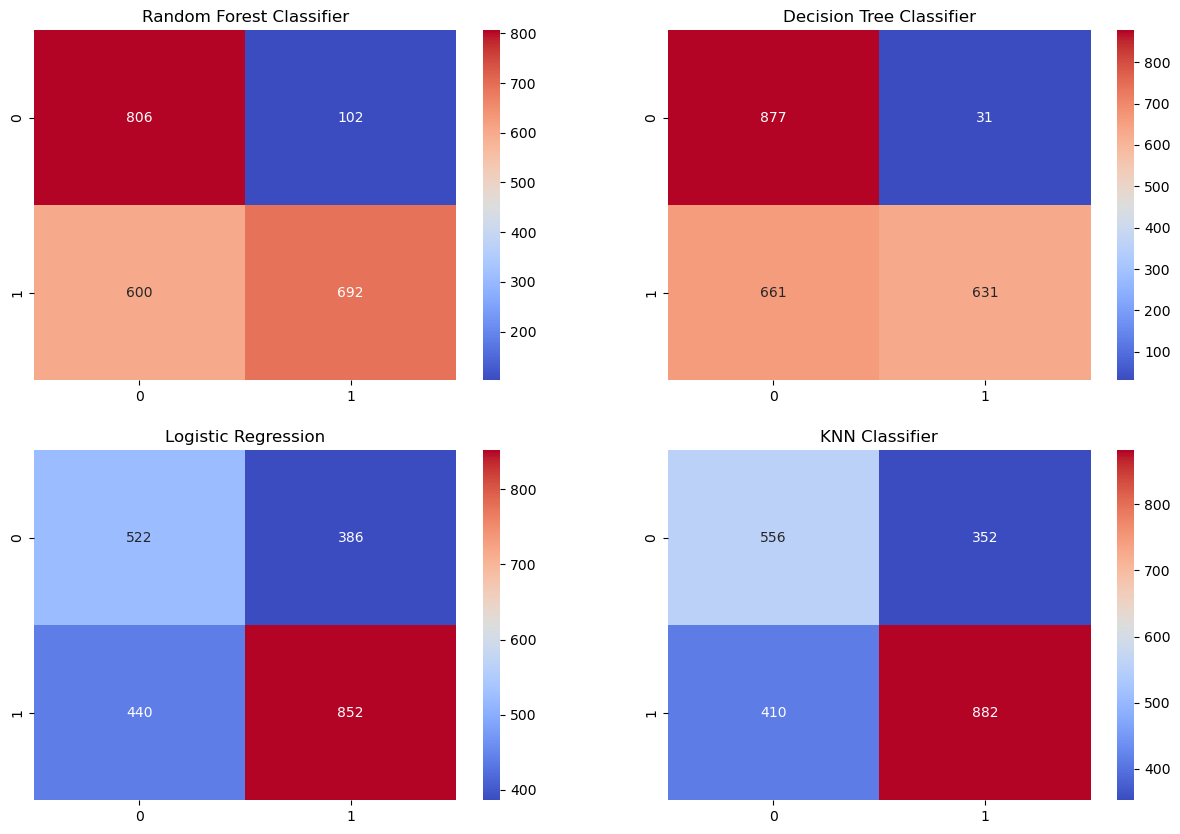

In [161]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rfc_predictions), annot=True, cmap='coolwarm',fmt='d', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_predictions), annot=True, cmap='coolwarm',fmt='d', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, cmap='coolwarm',fmt='d', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, cmap='coolwarm',fmt='d', ax=ax[1,1]).set_title('KNN Classifier')

<div style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 60%; margin: 0 auto; border-radius:10px 50px; border: 2px solid white; box-shadow: 0 0 10px white;">
    Insight:<br>
    1.Random Forest: Best performance with minimal misclassifications.<br>
    2.Decision Tree: Good, but slightly more errors than Random Forest.<br>
    3.Logistic Regression: Balanced performance; simpler and generalizable.<br>
    4.KNN Classifier: Higher misclassification; may need tuning for better results.
</div>


<a id="import"></a>
<p style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:15px; padding:10px;">
    Step 9 | Model Comparsion
</p>


Text(0, 0.5, 'Accuracy')

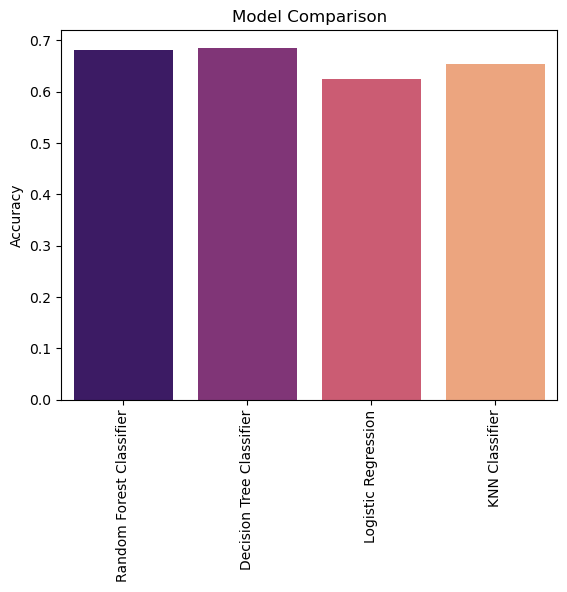

In [350]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_predictions), accuracy_score(y_test, dtc_predictions), accuracy_score(y_test, lr_predictions), accuracy_score(y_test, knn_predictions)]
sns.barplot(x=models, y=accuracy, palette='magma',hue=models,legend=False).set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

<div style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; text-align:center; padding:15px; width: 60%; margin: 0 auto; border-radius:10px 50px; border: 2px solid white; box-shadow: 0 0 10px white;">
    Insight:<br>
    The Random Forest and Decision Tree classifiers achieved the highest accuracy among the models tested, closely followed by Logistic Regression and KNN Classifier. This indicates that ensemble-based and tree-based approaches may be more effective for this dataset.
</div>


<div style="background-color:#4682B4; font-family:calibri; color:white; font-size:150%; ; padding:15px; margin: 0 auto; border-radius:10px 10px; border: 2px solid white; box-shadow: 0 0 10px white;">
    <h1>Conclusion:</h1>
    - The project aimed to predict on-time delivery of e-commerce products and analyze factors affecting delivery times and customer behavior.<br><br>
    - Key findings:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;- Products weighing 2500-3500 grams and priced below $250 were more likely to arrive on time.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;- Warehouse F, near a seaport, handled a significant number of shipments.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;- More customer care calls often indicated delivery delays.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;- Loyal customers with multiple purchases experienced more punctual deliveries.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;- Products with higher discounts (>10%) were delivered on time more frequently.<br><br>
    - <b>Model Performance</b>:<br>
    &nbsp;&nbsp;&nbsp;&nbsp;- Decision Tree Classifier: 69% accuracy (best performer)..<br>
    &nbsp;&nbsp;&nbsp;&nbsp;- Random Forest Classifier: 68% accuracy.<br>
    &nbsp;&nbsp;&nbsp;&nbsp;- KNN Classifier : 65% accuracy <br>
    &nbsp;&nbsp;&nbsp;&nbsp;- Logistic Regression : 62% accuracy.(least accurate).<br>
</div>
